In [47]:
%reload_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from dops import *

In [48]:
def generate_data(u, theta, C, n, k):
    S = np.zeros((n, len(u)))
    z = np.zeros(n)
    for i in range(n):
        features = np.random.choice(u, size=k, replace=False)
        S[i] = np.array([1 if j in features else 0 for j in u])
        cs = []
        for f in features:
            for j, l in enumerate(C[f]):
                if l == 1 and j not in cs:
                    cs.append(j)
        z[i] = np.sum(theta[cs])
    return S, z

def two_largest(l):
    index1, index2, first, second = 0, 0, None, None
    for i, e in enumerate(l):
        if first == None or e >= first:
            first = e
            index1 = i
        elif second == None or second < e:
            second = e
            index2 = i
    return [index1, index2]

In [93]:
repeat = 20
lins = []
preds = []
truth = []
t1 = time.time()
for j in range(repeat):
    k = 5
    d = 20
    u = np.arange(d)
    np.random.seed(j+100)
    theta = np.random.randint(100, size=d)
    C = np.eye(d)
    for i in range(d):
        np.random.seed(i)
        features = np.random.choice(u, size=np.random.randint(1,8), replace=False)
        C[i][features] = 1
    S, z = generate_data(u, theta, C, 180, k)
    T, v = generate_data(u, theta, C, 10, k)
    reg = LinearRegression().fit(S, z)
    res_lin = reg.predict(T)
    res, pred_theta, max_item = dops(S, z, T, C, 10, 0.8, np.zeros(d), \
        loss='approx',batch_size=5, eta=1, iters=50, print_every=20, cover_indices=range(d))
    lins.append(res_lin)
    preds.append(res)
    truth.append(v)
t2 = time.time()
print(t2-t1)

Iter 20, theta: [0.88144599 1.00619214 0.89792935 0.95451125 1.03111702 0.94480634
 0.86048389 0.98962371 0.95551727 0.92052276 0.96866471 0.98946068
 0.95478731 0.8690562  0.82737201 0.8371946  0.78700621 0.81529895
 0.86473513 0.92878426], gradient: [-0.0296385  -0.02345197  0.03698234 -0.00303886  0.00361259 -0.00129842
 -0.01404569 -0.00259407 -0.05695402  0.01346402 -0.01616716 -0.02763483
 -0.01130317 -0.02023595  0.01517634  0.01763198  0.01341822  0.01632474
  0.01201712  0.02386273]
Iter 40, theta: [0.8747916  0.97997794 0.93348218 0.96719776 1.01920702 0.94481679
 0.82408115 0.99988037 0.89176885 0.95803528 0.98116688 0.98560294
 0.98046232 0.89491014 0.86614092 0.84290223 0.82843056 0.85606705
 0.90093049 0.99842577], gradient: [-1.46354341e-02  1.99944856e-02 -3.15104065e-02 -8.20056083e-03
 -2.16863391e-02 -4.02946562e-04  1.64369531e-02 -2.99076299e-05
  1.25255448e-02  3.92112008e-02  1.58274341e-02  2.65073411e-03
 -3.40510874e-02 -2.41891306e-02  3.88566575e-02  7.1541

Iter 20, theta: [0.94082462 0.966334   0.79216217 0.9821059  0.98395235 0.892058
 0.88758498 0.97092761 0.98769474 0.90176293 0.94219218 0.93329566
 0.87472357 0.95373705 0.80646045 0.85868133 0.87887676 0.84681006
 0.92365152 0.99406885], gradient: [-0.01562718 -0.01758317  0.05137388 -0.00447353  0.00182142 -0.0019855
 -0.00560375  0.0052319  -0.04974298  0.01877407 -0.00695196 -0.04834275
 -0.02381911 -0.0407324   0.01744845  0.03467033  0.02138586  0.05003585
  0.01174621  0.00435054]
Iter 40, theta: [0.92791299 0.99545083 0.77198101 0.99114874 0.95837068 0.9044885
 0.91545974 0.98781461 0.91572323 0.9434787  0.97205513 0.90232
 0.88916008 0.94546155 0.91893139 0.92885611 0.85085385 0.92640534
 0.94321651 1.01754752], gradient: [ 0.02007348 -0.03149444  0.00728097 -0.00221282  0.04554505  0.02612212
  0.02350779 -0.00304635  0.03607367  0.02515539 -0.04865288  0.02438952
  0.02705192  0.0006511  -0.06848144 -0.03980978 -0.00752463 -0.01542247
 -0.03324349 -0.01347026]
Iter 20, thet

Iter 40, theta: [0.8146284  0.98308205 0.87669515 0.97956941 0.93176557 0.92999708
 0.87201547 0.98833171 0.81993039 0.89383668 0.98032039 0.98651691
 0.87626467 0.83255262 0.88931387 0.8396366  0.76506791 0.89622276
 0.85785381 0.99090517], gradient: [ 0.04722853  0.01410385 -0.00844526 -0.00510765 -0.0675348   0.00511832
  0.02062292 -0.00291707  0.02403022  0.02036393  0.00222295  0.01210542
  0.01858998  0.01623339  0.03637609  0.00419486  0.0153146  -0.02808717
 -0.0829175  -0.02370228]
Iter 20, theta: [0.93743154 1.01574543 0.81707349 0.95289716 0.96753025 0.98227383
 0.88930545 0.93245883 0.95329513 0.79794004 0.99014802 0.99947666
 0.94452204 0.93123625 0.85985612 0.87448749 0.77046746 0.8613035
 0.9069762  0.92871857], gradient: [-0.0263564  -0.02017078  0.04563742 -0.00552571  0.01301352  0.00806846
  0.01071922 -0.00438529 -0.04560479  0.01793739 -0.02329633 -0.03673798
 -0.01744092 -0.02463141  0.00871403  0.0236814   0.0244621   0.03258778
  0.00977976 -0.00561798]
Iter 40

In [94]:
lin = []
pred = []
real = []
rand = []
for i in range(repeat):
    lin.append(truth[i][np.argmax(lins[i])])
    pred.append(truth[i][np.argmax(preds[i])])
    real.append(max(truth[i]))
    rand.append(np.median(truth[i]))

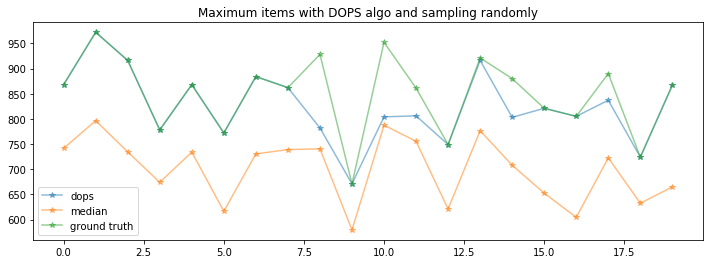

In [95]:
plt.figure(figsize=(12,4))
# plt.plot(range(repeat), lin, '*-', alpha=0.5, label='LR')
plt.plot(range(repeat), pred, '*-', alpha=0.5, label='dops')
plt.plot(range(repeat), rand, '*-', alpha=0.5, label='median')
plt.plot(range(repeat), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Maximum items with DOPS algo and sampling randomly')
plt.show()

In [96]:
pred_theta

array([0.94637703, 0.99753964, 0.83638928, 0.9616967 , 0.99178715,
       0.98858974, 0.91595983, 0.94267935, 0.87438879, 0.85864418,
       0.99995498, 0.97822564, 0.94349252, 0.91195592, 0.90580049,
       0.90958969, 0.8329169 , 0.92125816, 0.96064936, 0.98749716])